### 问题
假设我们有一些样本点$\boldsymbol{X}$和对应的目标$\boldsymbol{y}$，已知$\boldsymbol{y}$可以由$f(\boldsymbol{x}) = \boldsymbol{w \cdot x}+ b$加上噪音生成，求解函数$f$的参数$\boldsymbol{w}$和$b$。

### 求解
&emsp;&emsp;首先定义$f(\boldsymbol{x})$相对于$y$的损失函数

$$L(f,y) = \frac{1}{2}\sum_{\boldsymbol{x}} (f(\boldsymbol{x})-y)^2 = \frac{1}{2}\sum_{\boldsymbol{x}}(\boldsymbol{w \cdot x}+b - y)^2$$

那么损失函数相对于参数$\boldsymbol{w}$和$b$的导数分别为:

$$\frac{\partial L}{\partial \boldsymbol{w}} = \sum_{\boldsymbol{x}} \boldsymbol{x}(\boldsymbol{w \cdot x} + b - y)$$

$$\frac{\partial L}{\partial b} =  \sum_{\boldsymbol{x}} (\boldsymbol{w \cdot x} + b - y)$$

根据梯度下降法的公式可以得到参数的更新公式：

$$\boldsymbol{w} = \boldsymbol{w} - \eta \frac{\partial L}{\partial \boldsymbol{w}}$$
$$b = b - \eta \frac{\partial L}{\partial b}$$

下面将使用Python的Numpy实现上述过程

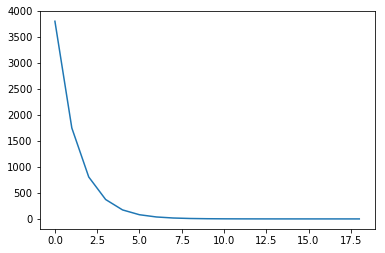

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 定义w和b
feature_num = 10
w_real = np.random.random(feature_num)
b_real = np.random.random()

## 生成训练数据
instance_num = 1000
X = np.random.uniform(-100,100,(feature_num, instance_num))
y = np.matmul(w_real, X) + b_real
y = y + np.random.random(y.shape)

## 初始化参数
w = np.random.random(feature_num)
b = np.random.random()

iter_time = 20
step_size = 0.0001
loss_value = []

## 迭代求解
for i in range(iter_time):
    delta = np.matmul(w, X) + b_real - y
    loss_value.append((delta*delta).mean())
    w = w - step_size*(np.matmul(delta, X.T))/instance_num
    b = b - step_size*delta.mean()
plt.clf
plt.plot(np.array(loss_value[1:]))
plt.show()

In [2]:
w

array([ 0.79842335,  0.42003747,  0.04151777,  0.05549998,  0.71396875,
        0.60893848,  0.19337114,  0.42662969,  0.27833712,  0.63035355])

In [3]:
w_real

array([ 0.79855966,  0.41969485,  0.04192018,  0.05457261,  0.7145736 ,
        0.60895623,  0.19295485,  0.42620365,  0.27826274,  0.63047412])